In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import joblib

In [2]:
# Load Data
if os.path.exists('data.joblib') and os.path.exists('labels.joblib'):
    data = joblib.load('data.joblib')
    labels = joblib.load('labels.joblib')
else:
    print("Error: Data files not found.")
    exit()

In [3]:
# Convert labels to numerical values
label_dict = {label: idx for idx, label in enumerate(set(labels))}
numeric_labels = np.array([label_dict[label] for label in labels])
X = np.array(data)
y = np.array(numeric_labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [4]:
from tabulate import tabulate

# Counting samples per genre in training set
train_genre_counts = {label: np.sum(y_train == idx) for label, idx in label_dict.items()}

# Counting samples per genre in testing set
test_genre_counts = {label: np.sum(y_test == idx) for label, idx in label_dict.items()}

# Convert counts to a list of lists for tabulate
table_data = []

for label, count in train_genre_counts.items():
    table_data.append([label, count, test_genre_counts[label]])

# Headers for the table
headers = ["Genre", "Training Samples", "Testing Samples"]

# Print the table
print("Training and Testing Set Samples per Genre:")
print(tabulate(table_data, headers=headers, tablefmt="grid"))

Training and Testing Set Samples per Genre:
+-----------+--------------------+-------------------+
| Genre     |   Training Samples |   Testing Samples |
+===========+====================+===================+
| jazz      |                807 |               193 |
+-----------+--------------------+-------------------+
| metal     |                814 |               187 |
+-----------+--------------------+-------------------+
| blues     |                793 |               208 |
+-----------+--------------------+-------------------+
| pop       |                791 |               209 |
+-----------+--------------------+-------------------+
| country   |                803 |               198 |
+-----------+--------------------+-------------------+
| rock      |                804 |               196 |
+-----------+--------------------+-------------------+
| classical |                799 |               201 |
+-----------+--------------------+-------------------+
| reggae    |        

In [5]:
def build_cnn_model(input_shape, filters=32, kernel_size=3, dropout_rate=0.3, l2_reg=0.001):
    model = Sequential()
    model.add(Conv1D(filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())  # Pooling after the first convolutional layer
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv1D(filters*4, kernel_size, activation='relu'))  # Added third convolutional layer
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(len(label_dict), activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline_cnn_model = build_cnn_model(input_shape=(X_train_cnn.shape[1], 1))

baseline_cnn_history = baseline_cnn_model.fit(
        X_train_cnn, y_train_onehot, 
        epochs=50, batch_size=32, 
        validation_data=(X_test_cnn, y_test_onehot)
    )


c:\Users\gvbpena\Desktop\recover\thesis\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.2347 - loss: 2.2239 - val_accuracy: 0.4413 - val_loss: 1.8390
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4077 - loss: 1.7217 - val_accuracy: 0.5082 - val_loss: 1.5286
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4610 - loss: 1.5807 - val_accuracy: 0.5297 - val_loss: 1.4108
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4900 - loss: 1.4935 - val_accuracy: 0.5427 - val_loss: 1.3443
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5115 - loss: 1.4339 - val_accuracy: 0.5627 - val_loss: 1.3092
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5289 - loss: 1.3690 - val_accuracy: 0.5647 - val_loss: 1.2548
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5503 - loss: 1.3071 - val_accuracy: 0.5877 - val_loss: 1.2039
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5569 - loss: 1.2829 - val_accuracy: 0.

In [6]:
print(baseline_cnn_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 36, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 18, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 14, 128)        │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,688 (1.51 MB)

 Trainable params: 131,434 (513.41 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 262,870 (1.00 MB)

None


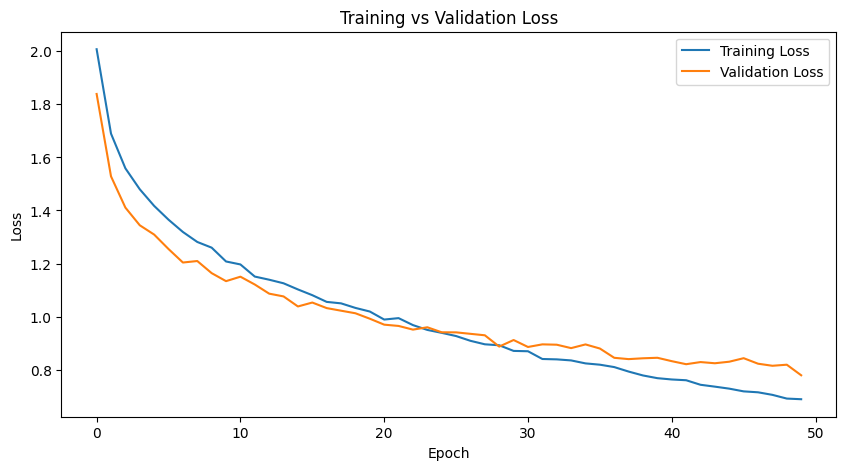

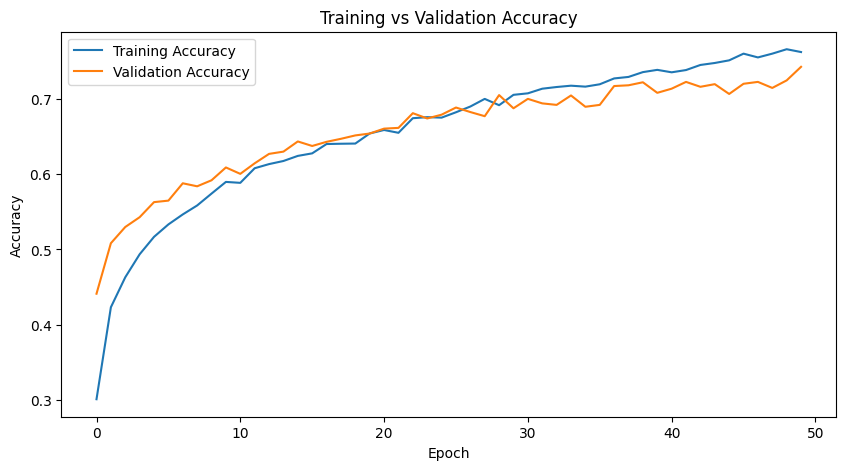

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7458 - loss: 0.7785
Highest Training Accuracy: 0.7655 at Epoch 49, Validation Accuracy: 0.7241
Minimum Training Loss: 0.6888 at Epoch 50, Validation Loss: 0.7790
Test Accuracy: 74.21%


In [7]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(baseline_cnn_history.history['loss'], label='Training Loss')
plt.plot(baseline_cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(baseline_cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Find the epoch with the highest training accuracy and corresponding validation accuracy
max_train_accuracy_epoch = np.argmax(baseline_cnn_history.history['accuracy']) + 1
max_train_accuracy = np.max(baseline_cnn_history.history['accuracy'])
corresponding_val_accuracy = baseline_cnn_history.history['val_accuracy'][max_train_accuracy_epoch - 1]

# Find the epoch with the minimum training loss and corresponding validation loss
min_train_loss_epoch = np.argmin(baseline_cnn_history.history['loss']) + 1
min_train_loss = np.min(baseline_cnn_history.history['loss'])
corresponding_val_loss = baseline_cnn_history.history['val_loss'][min_train_loss_epoch - 1]

# Calculate test accuracy
test_loss, test_accuracy = baseline_cnn_model.evaluate(X_test_cnn, y_test_onehot)

# Print the results
print(f"Highest Training Accuracy: {max_train_accuracy:.4f} at Epoch {max_train_accuracy_epoch}, Validation Accuracy: {corresponding_val_accuracy:.4f}")
print(f"Minimum Training Loss: {min_train_loss:.4f} at Epoch {min_train_loss_epoch}, Validation Loss: {corresponding_val_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")


In [8]:
from sklearn.metrics import classification_report

# Predictions for test data
y_pred = np.argmax(baseline_cnn_model.predict(X_test_cnn), axis=1)

# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test_onehot, axis=1)

# Calculate precision, recall, and F1-score
cnn_report = classification_report(y_test_labels, y_pred)

# Print the classification report

print("CNN Metrics:")
print(cnn_report)

saved_folder = 'new'
baseline_cnn_model.save(os.path.join(saved_folder, 'baseline_cnn_model.h5'))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


CNN Metrics:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       193
           1       0.88      0.90      0.89       187
           2       0.77      0.67      0.72       208
           3       0.71      0.67      0.69       209
           4       0.69      0.74      0.71       198
           5       0.65      0.60      0.62       196
           6       0.92      0.95      0.93       201
           7       0.69      0.75      0.72       200
           8       0.71      0.65      0.68       200
           9       0.65      0.72      0.68       209

    accuracy                           0.74      2001
   macro avg       0.74      0.74      0.74      2001
weighted avg       0.74      0.74      0.74      2001

